This creates a list of all the years of data that will be used

In [2]:
years = list(range(2002, 2023))

This is the base url that we will use to get the tables of statistics for each year

In [3]:
url_base = "https://www.pro-football-reference.com/years/{}/fantasy.htm"

In [4]:
import requests

for year in years:
    url = url_base.format(year)
    data = requests.get(url)
    
    with open("{}.html".format(year), "w+") as f:
        f.write(data.text)

In [5]:
from bs4 import BeautifulSoup

Tested the 2022 file to see how to get the table using BeautifulSoup before running the loop for all the years

In [6]:
with open("2022.html") as f:
    page = f.read()

In [7]:
soup = BeautifulSoup(page, "html.parser")
soup.find('tr', class_="over_header").decompose()

In [8]:
fantasy_pts_table = soup.find(id="fantasy")

In [9]:
import numpy as np
import pandas as pd

In [10]:
stats_2022 = pd.read_html(str(fantasy_pts_table))

In [11]:
stats_2022[0]

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,TD.3,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank
0,1,Patrick Mahomes*+,KAN,QB,27,17,17,435,648,5250,...,4,1,2,416,417.4,435.4,428.9,136,1,1
1,2,Josh Jacobs*+,LVR,RB,24,17,17,0,0,0,...,12,NaN,NaN,275,328.3,335.3,301.8,127,1,2
2,3,Christian McCaffrey*,2TM,RB,26,17,16,1,1,34,...,13,NaN,NaN,271,356.4,362.4,313.9,123,2,3
3,4,Derrick Henry*,TEN,RB,28,16,16,2,2,4,...,13,NaN,NaN,270,302.8,311.8,286.3,122,3,4
4,5,Justin Jefferson*+,MIN,WR,23,17,17,2,2,34,...,9,1,NaN,241,368.7,371.7,304.7,119,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,646,Ihmir Smith-Marsette,2TM,WR,23,8,0,0,0,0,...,0,NaN,NaN,-1,0.4,1.4,-0.1,NaN,252,NaN
667,647,KaVontae Turpin*,DAL,WR,26,17,0,0,0,0,...,0,NaN,NaN,-1,-0.4,1.6,-0.9,NaN,254,NaN
668,648,Taiwan Jones,BUF,NaN,34,16,0,0,0,0,...,0,NaN,NaN,-2,-2.0,-1.0,-2.0,NaN,173,NaN
669,649,Chester Rogers,CLE,NaN,28,3,0,0,0,0,...,0,NaN,NaN,-2,-2.0,-1.0,-2.0,NaN,255,NaN


In [75]:
dfs = []
for year in years:
    with open("{}.html".format(year)) as f:
        page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="over_header").decompose()
    fantasy_pts_table = soup.find(id="fantasy")
    stats = pd.read_html(str(fantasy_pts_table))
    x = stats[0]
    x["Year"] = year
    dfs.append(x)

In [76]:
dfs[0]

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year
0,1,Priest Holmes*+,KAN,RB,29,14,14,0,1,0,0,0,313,1615,5.16,21,81,70,672,9.60,3,1,1,24,NaN,NaN,371,440.7,447.7,405.7,220,1,1,2002
1,2,Ricky Williams*+,MIA,RB,25,16,16,0,0,0,0,0,383,1853,4.84,16,59,47,363,7.72,1,7,4,17,NaN,NaN,316,362.6,372.6,339.1,165,2,2,2002
2,3,LaDainian Tomlinson*,SDG,RB,23,16,16,0,0,0,0,0,372,1683,4.52,14,101,79,489,6.19,1,3,1,15,NaN,NaN,305,384.2,391.2,344.7,155,3,3,2002
3,4,Clinton Portis,DEN,RB,21,16,12,0,0,0,0,0,273,1508,5.52,15,49,33,364,11.03,2,5,3,17,NaN,NaN,283,316.2,325.2,299.7,133,4,4,2002
4,5,Marvin Harrison*+,IND,WR,30,16,16,0,0,0,0,0,2,10,5.00,0,205,143,1722,12.04,11,0,NaN,11,1,NaN,241,384.2,387.2,312.7,122,1,5,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,571,Ronald Curry,OAK,NaN,23,1,0,0,0,0,0,0,0,0,NaN,0,0,0,0,NaN,0,1,1,0,NaN,NaN,-2,-2.0,-1.0,-2.0,NaN,195,NaN,2002
590,572,Damon Gibson,2TM,NaN,27,2,0,0,0,0,0,0,0,0,NaN,0,0,0,0,NaN,0,1,1,0,NaN,NaN,-2,-2.0,-1.0,-2.0,NaN,196,NaN,2002
591,573,Albert Johnson,MIA,NaN,25,4,0,0,0,0,0,0,0,0,NaN,0,0,0,0,NaN,0,1,1,0,NaN,NaN,-2,-2.0,-1.0,-2.0,NaN,197,NaN,2002
592,574,Tamarick Vanover,SDG,NaN,28,7,0,0,0,0,0,0,0,0,NaN,0,2,0,0,NaN,0,3,1,0,NaN,NaN,-2,-2.0,-1.0,-2.0,NaN,198,NaN,2002


In [14]:
fantasy_stats = pd.concat(dfs)

Subsets data for only wide recievers and running backs

In [15]:
fantasy_stats_wr = fantasy_stats[fantasy_stats["FantPos"] == "WR"]
fantasy_stats_rb = fantasy_stats[fantasy_stats["FantPos"] == "RB"]

In [16]:
pd.set_option('display.max_columns', None)

Renaming Columns

In [17]:
fantasy_stats_wr.columns = ['Rank', 'Player', 'Team', 'FantPos', 'Age', 'GamesPlayed', 'GamesStarted', 
                            'Completions', 'PassingAttempts', 'PassingYds',
       'PassingTD', 'Int', 'RushingAttempts', 'RushingYds', 'Y/A', 'RushingTD', 'Targets', 'Rec', 'RecievingYds',
       'Y/R', 'RecievingTD', 'Fumble', 'FumbleLost', 'TDTotal', '2PM', '2PP', 'FantPt', 'PPR',
       'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank', 'Year']

In [18]:
fantasy_stats_wr = fantasy_stats_wr[['Player', 'FantPos', 'PPR','PosRank', 'Year']]

Subset for only top 10 recievers every year

In [19]:
fantasy_stats_wr.dtypes

Player     object
FantPos    object
PPR        object
PosRank    object
Year        int64
dtype: object

In [20]:
convert_dict = {'PosRank': int}
fantasy_stats_wr = fantasy_stats_wr.astype(convert_dict)
fantasy_stats_wr = fantasy_stats_wr[fantasy_stats_wr["PosRank"] < 11]

In [21]:
fantasy_stats_wr

,Player,FantPos,PPR,PosRank,Year
4,Marvin Harrison*+,WR,384.2,1,2002
7,Hines Ward*,WR,337.1,2,2002
9,Terrell Owens*+,WR,321.9,3,2002
14,Eric Moulds*,WR,289.9,4,2002
16,Randy Moss*,WR,290.3,5,2002
...,...,...,...,...,...
15,CeeDee Lamb*,WR,301.6,6,2022
18,Jaylen Waddle,WR,259.2,7,2022
23,Amari Cooper,WR,246.0,8,2022
26,Amon-Ra St. Brown*,WR,267.6,9,2022


In [22]:
fantasy_stats_rb = fantasy_stats_rb[['Player', 'FantPos', 'PPR','PosRank', 'Year']]
fantasy_stats_rb

,Player,FantPos,PPR,PosRank,Year
0,Priest Holmes*+,RB,440.7,1,2002
1,Ricky Williams*+,RB,362.6,2,2002
2,LaDainian Tomlinson*,RB,384.2,3,2002
3,Clinton Portis,RB,316.2,4,2002
5,Shaun Alexander,RB,328.5,5,2002
...,...,...,...,...,...
578,Nick Bellore,RB,0.3,160,2022
598,Demetric Felton,RB,2.4,158,2022
612,Jordan Howard,RB,0.1,162,2022
615,Duke Johnson,RB,0.4,159,2022


In [23]:
convert_dict = {'PosRank': int}
fantasy_stats_rb = fantasy_stats_rb.astype(convert_dict)
fantasy_stats_rb = fantasy_stats_rb[fantasy_stats_rb["PosRank"] < 11]

Create a dictionary of key value pairs where the key is the year and value is the average PPR points of the top 10 wide reciever or running backs that year

In [24]:
avg_wr = {}
convert_dict = {'PPR': float}
fantasy_stats_wr = fantasy_stats_wr.astype(convert_dict)
year = 2002
while year < 2023:
    avg_df = fantasy_stats_wr[fantasy_stats_wr["Year"] == year]
    mean = avg_df["PPR"].mean()
    avg_wr[year] = mean
    year += 1

{2002: 290.90999999999997, 2003: 286.89, 2004: 286.51, 2005: 284.25, 2006: 267.65999999999997, 2007: 298.97999999999996, 2008: 267.73, 2009: 275.44, 2010: 270.56, 2011: 281.89, 2012: 292.44, 2013: 298.88, 2014: 308.12, 2015: 311.36, 2016: 274.87, 2017: 259.44, 2018: 312.24, 2019: 265.42999999999995, 2020: 288.08000000000004, 2021: 309.32000000000005, 2022: 299.65999999999997}


In [25]:
avg_rb = {}
convert_dict = {'PPR': float}
fantasy_stats_rb = fantasy_stats_rb.astype(convert_dict)
year = 2002
while year < 2023:
    avg_df = fantasy_stats_rb[fantasy_stats_rb["Year"] == year]
    mean = avg_df["PPR"].mean()
    avg_rb[year] = mean
    year += 1

{2002: 335.55999999999995, 2003: 335.77000000000004, 2004: 295.2, 2005: 302.74, 2006: 323.98, 2007: 270.03000000000003, 2008: 277.41999999999996, 2009: 285.66, 2010: 286.5, 2011: 272.8, 2012: 274.61, 2013: 282.6, 2014: 284.82000000000005, 2015: 231.91, 2016: 288.26, 2017: 280.33, 2018: 310.24, 2019: 296.80999999999995, 2020: 273.31, 2021: 270.44999999999993, 2022: 285.48}


Convert from a dictionary to a data frame

In [26]:
avg_df_wr = pd.DataFrame(list(avg_wr.items()), columns=["Year", "Avg_PPR_WR"])
avg_df_wr

,Year,Avg_PPR_WR
0,2002,290.91
1,2003,286.89
2,2004,286.51
3,2005,284.25
4,2006,267.66
5,2007,298.98
6,2008,267.73
7,2009,275.44
8,2010,270.56
9,2011,281.89


In [27]:
avg_df_rb = pd.DataFrame(list(avg_rb.items()), columns=["Year", "Avg_PPR_RB"])
avg_df_rb

,Year,Avg_PPR_RB
0,2002,335.56
1,2003,335.77
2,2004,295.20
3,2005,302.74
4,2006,323.98
5,2007,270.03
6,2008,277.42
7,2009,285.66
8,2010,286.50
9,2011,272.80


Plotting the average PPR points of the top 10 fantasy wide recivers and running backs for each year using matplotlib

In [29]:
import matplotlib.pyplot as plt

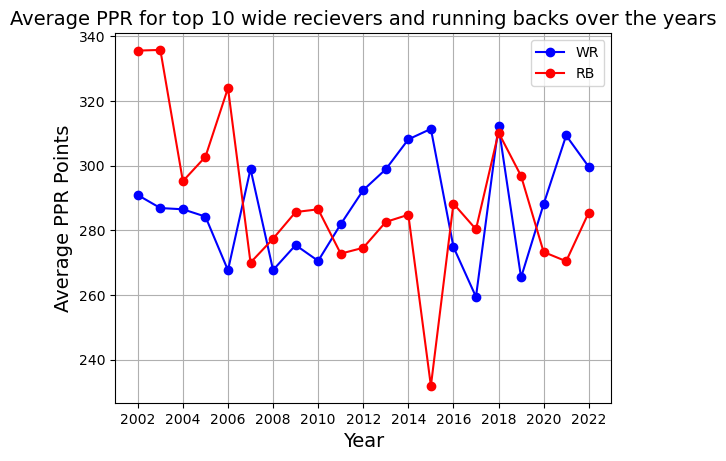

In [51]:
plt.plot(avg_df_wr['Year'], avg_df_wr['Avg_PPR_WR'], color='blue', marker='o')
plt.plot(avg_df_rb['Year'], avg_df_rb['Avg_PPR_RB'], color='red', marker='o')
plt.title('Average PPR for top 10 wide recievers and running backs over the years', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average PPR Points', fontsize=14)
plt.grid("True")
plt.legend(["WR", "RB"])
plt.xticks([2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022])
plt.show()

Creating lines of best fit to observe trends over the years for the averages

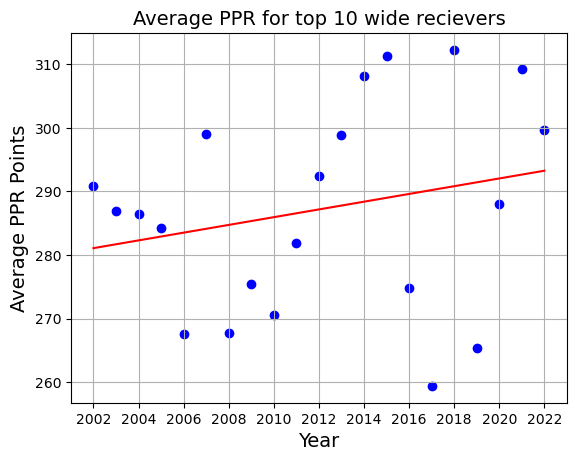

293.8657142857145


In [70]:
plt.scatter(avg_df_wr['Year'], avg_df_wr['Avg_PPR_WR'], color='blue', marker='o')
plt.title('Average PPR for top 10 wide recievers', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average PPR Points', fontsize=14)
plt.grid("True")
plt.xticks([2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022])
coefficients = np.polyfit(avg_df_wr['Year'], avg_df_wr['Avg_PPR_WR'], 1)
m, c = coefficients
y_fit = m * avg_df_wr['Year'] + c
plt.plot(avg_df_wr['Year'], y_fit, 'r')
plt.show()
prediction_wr = (m * 2023) + c

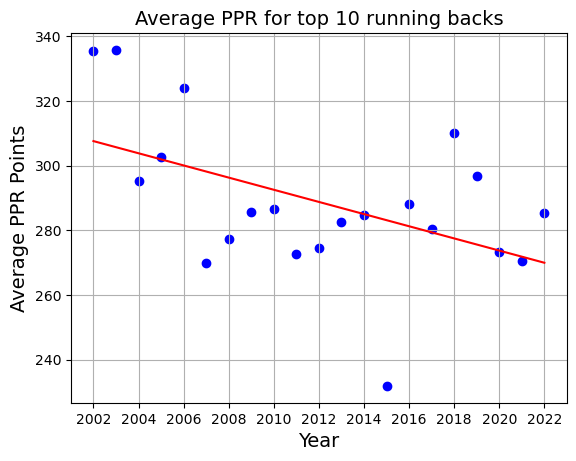

268.1033333333362


In [68]:
plt.scatter(avg_df_rb['Year'], avg_df_rb['Avg_PPR_RB'], color='blue', marker='o')
plt.title('Average PPR for top 10 running backs', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average PPR Points', fontsize=14)
plt.grid("True")
plt.xticks([2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022])
coefficients = np.polyfit(avg_df_rb['Year'], avg_df_rb['Avg_PPR_RB'], 1)
m, c = coefficients
y_fit = m * avg_df_rb['Year'] + c
plt.plot(avg_df_rb['Year'], y_fit, 'r')
plt.show()
prediction_rb = (m * 2023) + c

2023 predictions based on the lines of best fit for the average PPR points scored by the top 10 wide recievers and running backs

In [72]:
print("Predicted 2023 average PPR points scored by the top 10 wide recievers: " + str(prediction_wr))
print("Predicted 2023 average PPR points scored by the top 10 running backs: " + str(prediction_rb))

Predicted 2023 average PPR points scored by the top 10 wide recievers: 293.8657142857145
Predicted 2023 average PPR points scored by the top 10 running backs: 268.1033333333362
